In [14]:
# Import the libraries used

# basic mathematic operations 
import numpy as np
import pandas as pd

# for visualizations 
import matplotlib.pyplot as plt
%matplotlib inline 

import seaborn as sns

We first read the file using pandas. To learn more about pandas look [here](https://pandas.pydata.org/pandas-docs/stable/index.html)

In [3]:
file_name = 'Mall_Customers.csv'
file_df = pd.read_csv(file_name)

Below are a few common pandas modules to inpsect the data.  

In [6]:
file_df.head() # Show the first 5 rows 

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [7]:
file_df # Show the whole shabang

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [8]:
file_df.describe() # Describe shows the follwing stats about the data

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [27]:
file_df['Gender']  # Shows a specific column 

0        Male
1        Male
2      Female
3      Female
4      Female
        ...  
195    Female
196    Female
197      Male
198      Male
199      Male
Name: Gender, Length: 200, dtype: object

More often than not, the data contains null values, i.e., the excel sheet is not completely filled. One can check using the function below. 

In [47]:
file_df.isnull().any()

CustomerID                False
Gender                    False
Age                       False
Annual Income (k$)        False
Spending Score (1-100)    False
dtype: bool

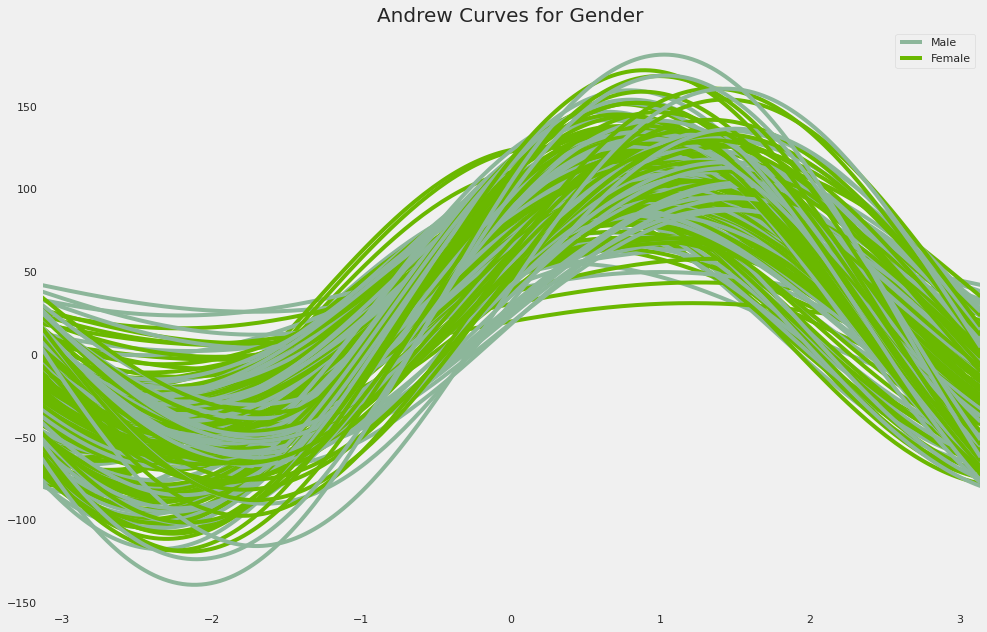

In [50]:
plt.rcParams['figure.figsize'] = (15, 10)

pd.plotting.andrews_curves(file_df.drop("CustomerID", axis=1), "Gender")
plt.title('Andrew Curves for Gender', fontsize = 20)
plt.show()

We can look at a histogram of the data. There are many ways to do this but one can google ' name_of_library_used histogram' to find, i.e., seaborn histogram. 

Lets read about seaborn's [distplot](https://seaborn.pydata.org/generated/seaborn.distplot.html)

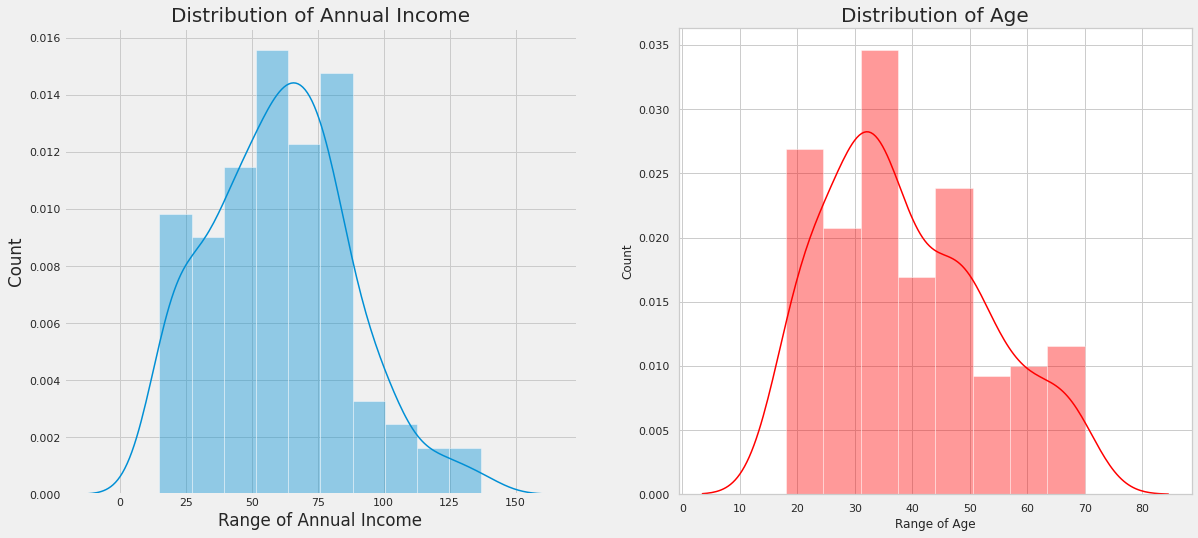

In [51]:

plt.rcParams['figure.figsize'] = (18, 8) # Size of figures

plt.subplot(1, 2, 1) # How many plots and which one are we currently filling
sns.set(style = 'whitegrid') # style
sns.distplot(file_df['Annual Income (k$)']) # Using seaborns sns, and pandas data frame 
plt.title('Distribution of Annual Income', fontsize = 20)
plt.xlabel('Range of Annual Income')
plt.ylabel('Count')


plt.subplot(1, 2, 2)
sns.set(style = 'whitegrid')
sns.distplot(file_df['Age'], color = 'red')
plt.title('Distribution of Age', fontsize = 20)
plt.xlabel('Range of Age')
plt.ylabel('Count')
plt.show()

What can we infer about the plots? 



Okay lets look at the most important, the distribution of the spending score. 

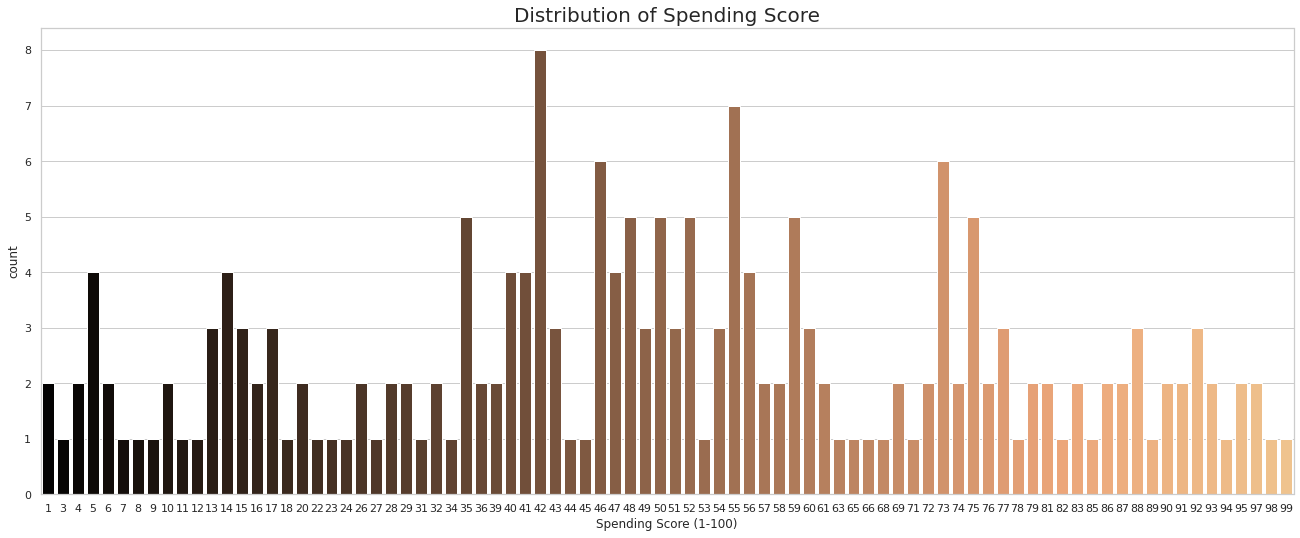

In [53]:
plt.rcParams['figure.figsize'] = (20, 8)
sns.countplot(file_df['Spending Score (1-100)'], palette = 'copper')
plt.title('Distribution of Spending Score', fontsize = 20)
plt.show()

An adequate function from seaborn is the pairplot function which shows the correlation between the various columns. We can read more [here](https://seaborn.pydata.org/generated/seaborn.pairplot.html)

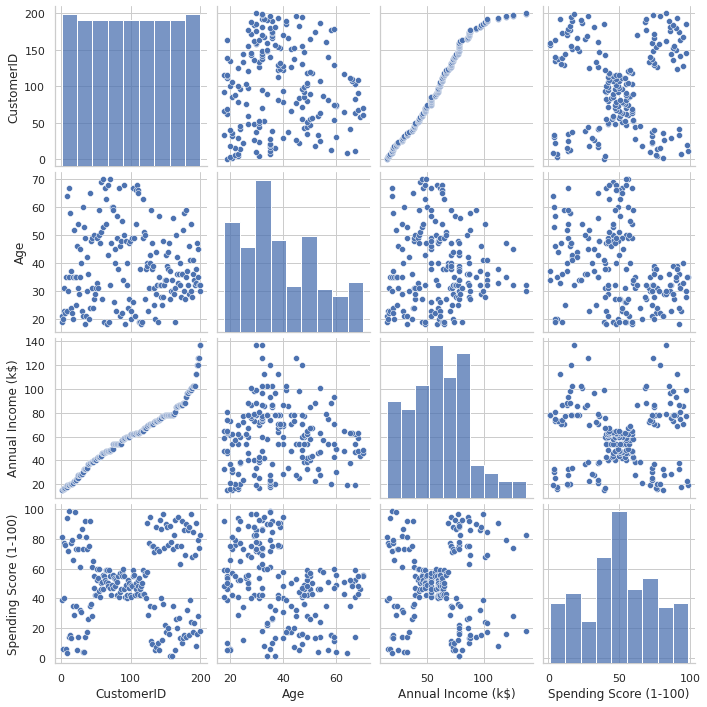

In [22]:
sns.pairplot(file_df)
plt.title('', fontsize = 20)
plt.show()

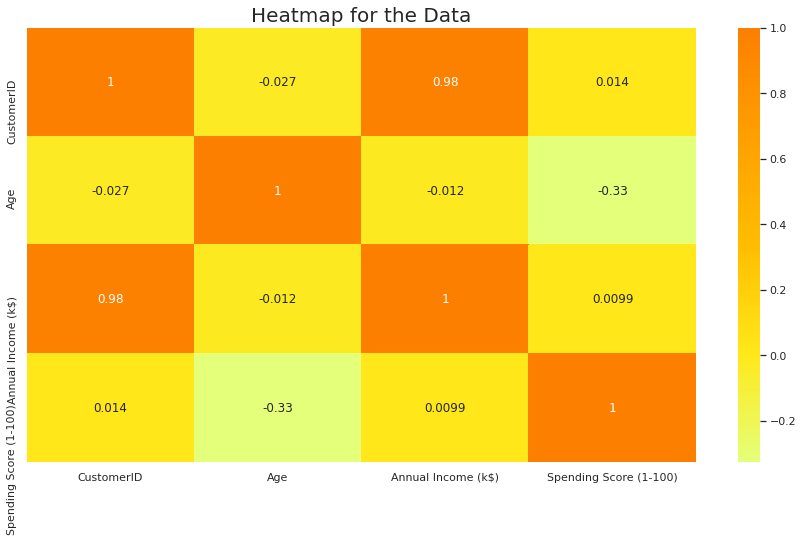

In [23]:
plt.rcParams['figure.figsize'] = (15, 8)
sns.heatmap(file_df.corr(), cmap = 'Wistia', annot = True)
plt.title('Heatmap for the Data', fontsize = 20)
plt.show()

We can use bivariate Analysis between gender and spending score using the [boxen-plot](https://seaborn.pydata.org/generated/seaborn.boxenplot.html). 

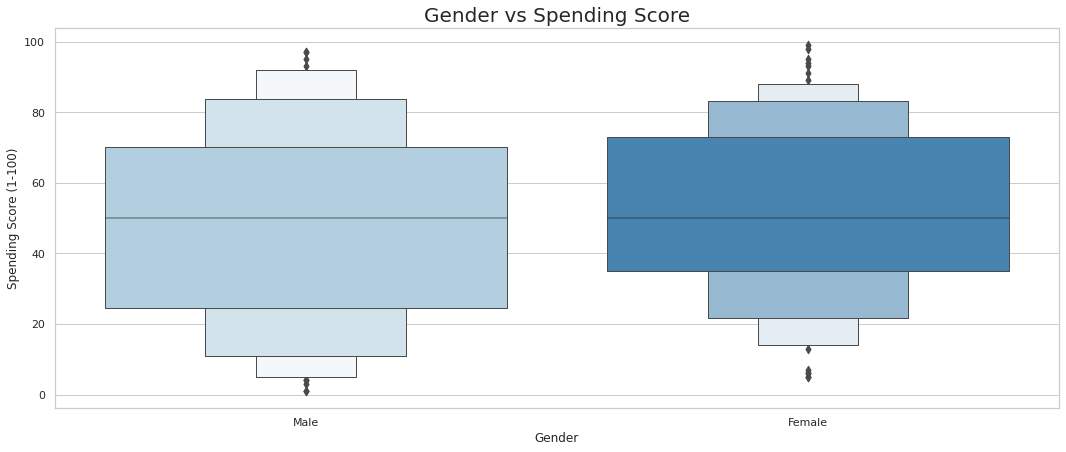

In [25]:
plt.rcParams['figure.figsize'] = (18, 7)
sns.boxenplot(file_df['Gender'], file_df['Spending Score (1-100)'], palette = 'Blues')
plt.title('Gender vs Spending Score', fontsize = 20)
plt.show()

We can use violin plots once again for bivariate analysis between gender and annual income.

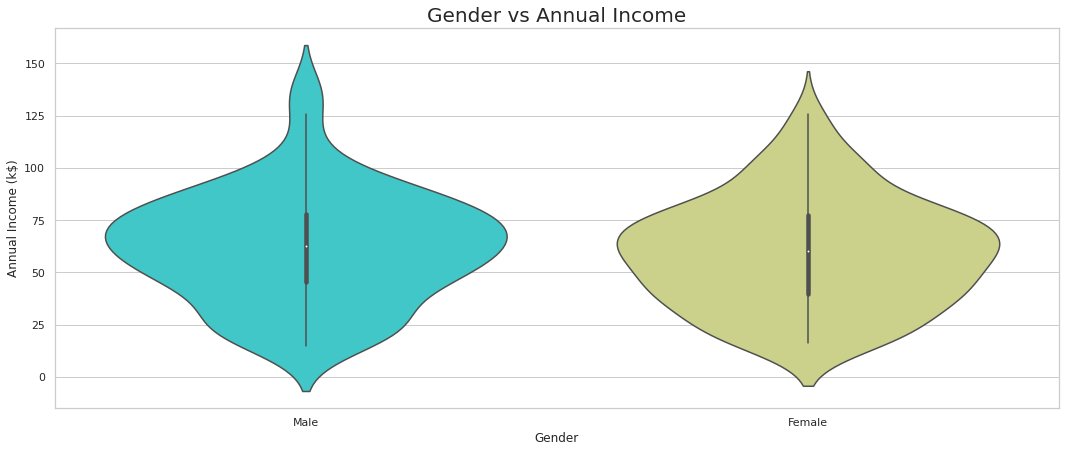

In [29]:
plt.rcParams['figure.figsize'] = (18, 7)
sns.violinplot(file_df['Gender'], file_df['Annual Income (k$)'], palette = 'rainbow')
plt.title('Gender vs Annual Income', fontsize = 20)
plt.show()

Now we will look at Kmeans clustering. We will use sklearn's [KMeans](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html) 

Basically we will look at the annual income vs spending score, and try to cluster the data into groups. 
Below is the initial data. We can see already that there are groups there. 

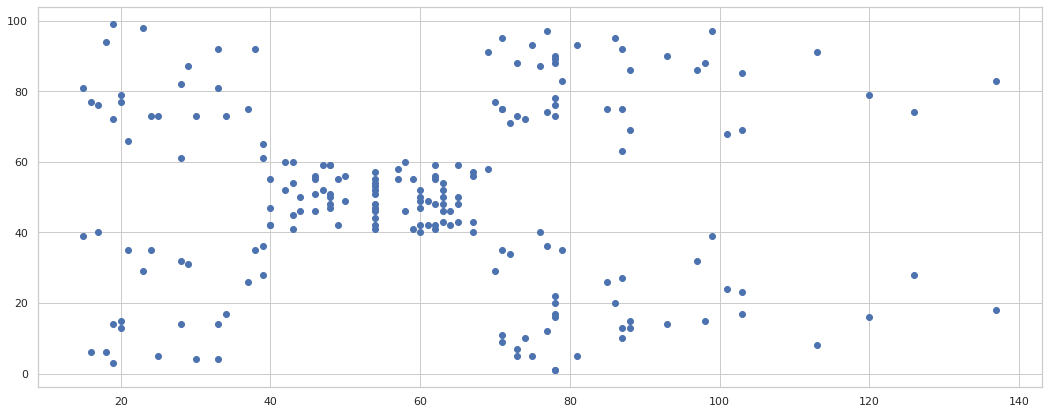

In [33]:
plt.scatter(file_df['Annual Income (k$)'], file_df['Spending Score (1-100)'])

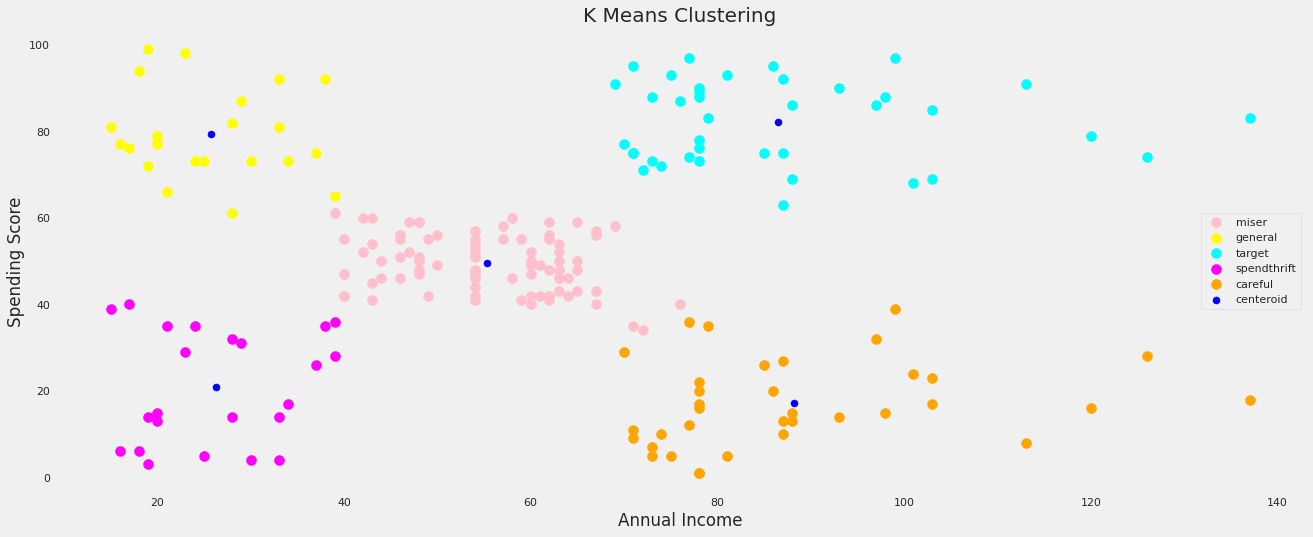

In [56]:
from sklearn.cluster import KMeans

x = file_df.iloc[:, [3, 4]].values # make a 2d list of the annual income vs spending score
# print(x)
km = KMeans(n_clusters = 5, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
y_means = km.fit_predict(x)
# print(y_means) # Output is then then a 1d list for each value in x that is an integer corresponding to the cluster it belongs to
plt.scatter(x[y_means == 0, 0], x[y_means == 0, 1], s = 100, c = 'pink', label = 'miser')
plt.scatter(x[y_means == 1, 0], x[y_means == 1, 1], s = 100, c = 'yellow', label = 'general')
plt.scatter(x[y_means == 2, 0], x[y_means == 2, 1], s = 100, c = 'cyan', label = 'target')
plt.scatter(x[y_means == 3, 0], x[y_means == 3, 1], s = 100, c = 'magenta', label = 'spendthrift')
plt.scatter(x[y_means == 4, 0], x[y_means == 4, 1], s = 100, c = 'orange', label = 'careful')
plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:, 1], s = 50, c = 'blue' , label = 'centeroid')

plt.style.use('fivethirtyeight')
plt.title('K Means Clustering', fontsize = 20)
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.legend()
plt.grid()
plt.show()



We can then instead cluster the ages vs spending scores

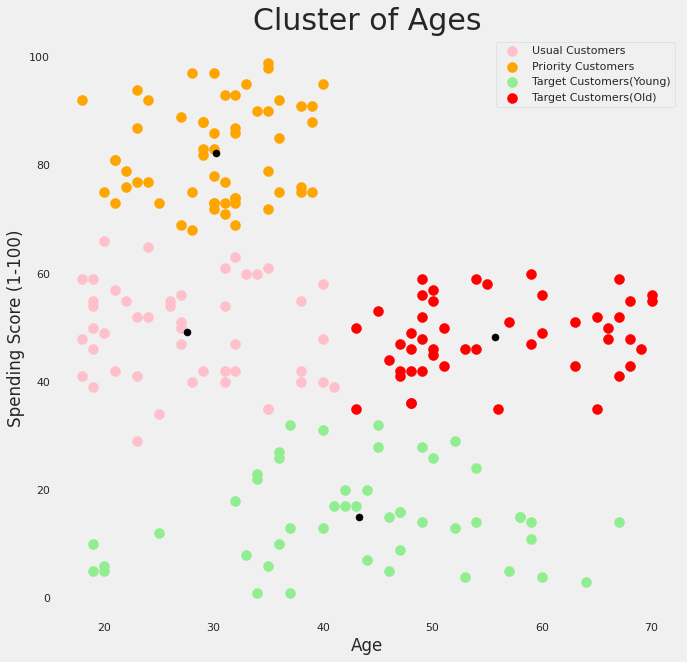

In [40]:
x = file_df.iloc[:, [2, 4]].values
x = [file_df['Age'], file_df['Spending Score']]
kmeans = KMeans(n_clusters = 4, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
ymeans = kmeans.fit_predict(x)

plt.rcParams['figure.figsize'] = (10, 10)
plt.title('Cluster of Ages', fontsize = 30)

plt.scatter(x[ymeans == 0, 0], x[ymeans == 0, 1], s = 100, c = 'pink', label = 'Usual Customers' )
plt.scatter(x[ymeans == 1, 0], x[ymeans == 1, 1], s = 100, c = 'orange', label = 'Priority Customers')
plt.scatter(x[ymeans == 2, 0], x[ymeans == 2, 1], s = 100, c = 'lightgreen', label = 'Target Customers(Young)')
plt.scatter(x[ymeans == 3, 0], x[ymeans == 3, 1], s = 100, c = 'red', label = 'Target Customers(Old)')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 50, c = 'black')

plt.style.use('fivethirtyeight')
plt.xlabel('Age')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.grid()
plt.show()

